In [1]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

In [2]:
delta = 0.025
boundary = 2.0
x = np.arange(-boundary, boundary, delta)
y = np.arange(-boundary, boundary, delta)
W1, W2 = np.meshgrid(x, y, indexing='ij')

sigma = 1.0

In [3]:
from scipy.stats import multivariate_normal

def eval_ll(y, w_1, w_2, sigma_n):
    Sigma = np.diag([sigma_n, sigma_n, sigma_n])
    mu = np.zeros((3,))
    mu[0] = w_1 - 5 * w_2
    mu[1] = w_1 + w_2
    mu[2] = w_1 + 5 * w_2
    likelihood = multivariate_normal(mu, Sigma)
    return likelihood.pdf(y)

In [4]:
likelihood = np.zeros((y.shape[0], x.shape[0]))
y_ = [-6., 1., 4.]
sigma_n = 1.0
x_start = min(x)
y_start = min(y)

x_cur = 0
y_cur = 0
for w_1 in x:
    y_cur = 0
    for w_2 in y:
        likelihood[x_cur, y_cur] = eval_ll(y_, w_1, w_2, sigma_n)
        y_cur += 1
    x_cur += 1

In [5]:
from jupyterthemes import jtplot

In [6]:
jtplot.style()

Text(0.5,1,'Simplest default with labels')

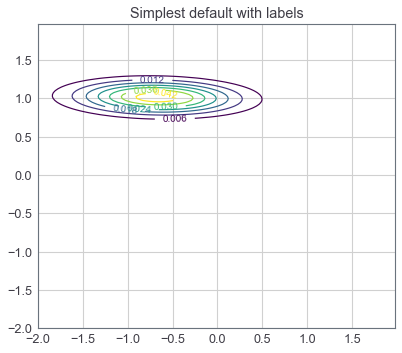

In [7]:
# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(W1, W2,likelihood)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')